In [1]:
# google drive 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
# 크롤링 데이터 불러오기
import pandas as pd

crawling_data = pd.read_csv('/content/drive/MyDrive/대학자료/대4/4학년 2학기/국어정보학/기말보고서/data/youtube_chatgpt_news_comments.csv')

In [73]:
# 옵션 설정: 텍스트 열의 최대 너비를 None으로 설정하여 전체 텍스트를 표시
pd.set_option('display.max_colwidth', None)

In [74]:
crawling_data.head(20)

,contentText
0,드디어 영화 [Her]가 현실이 되었네~! 음색 옵션에 '스칼렛 요한슨 음성으로'가 있으면 좋겠다!
1,진짜 헐(Her)이다..
2,실제로 샘알트먼이 그렇게 슬쩍 하려다가 걸려서 스칼렛 법률팀한테 지금 고소당하기 직전이네요 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 성지순례
3,@rslknv-lqiojnfpiqou3ph9o 근데 하나도 안비슷하긴 하더라 걍 다른 성우던데
4,별로
5,"미국: 자비스 만듬\n한국: 성형외과 미용 수술함\n\n미국: chatgpt, gemini, LLM등 인공지능 내전하면서 미친듯이 성장\n한국: 어떻게 먹은건지 신기한 아시아 최대크기 IT기업도 일본에 선물로 줌\n\n\nIT강?국?"
6,저긴 AI 법 제정하네 마네 하는데 우리는 여성 할당제 시행하네 폐지하네 이딴 걸로만 싸우고 있음 ㅋ
7,심지어 중국 최상위권 입시 준비반: 인공지능학과\n\n한국 최상위권 입시 준비반: 의대 진학반\n\n여기서만 봐도 걍 나라 망조임 ㅋㅋ
8,팩트는 어차피 특이점 와서 나라 망하든 말든 상관없다는거임ㅋㅋㅋㅋㅋ
9,미국한테 못비비지


## 데이터 개요

In [69]:
print('데이터 형태 확인:', crawling_data.shape)

데이터 형태 확인: (5871, 1)


In [72]:
# 전체 텍스트 통합
all_text = " ".join(crawling_data['contentText'])

# 통합 글자수와 단어 수 계산
total_char_count = len(all_text)
total_word_count = len(all_text.split())

print(f"전체 글자수: {total_char_count}")
print(f"전체 단어 수: {total_word_count}")

전체 글자수: 312755
전체 단어 수: 68732


최솟값: 1
최댓값: 1185
평균값: 48.15791268758527
중간값: 28.0


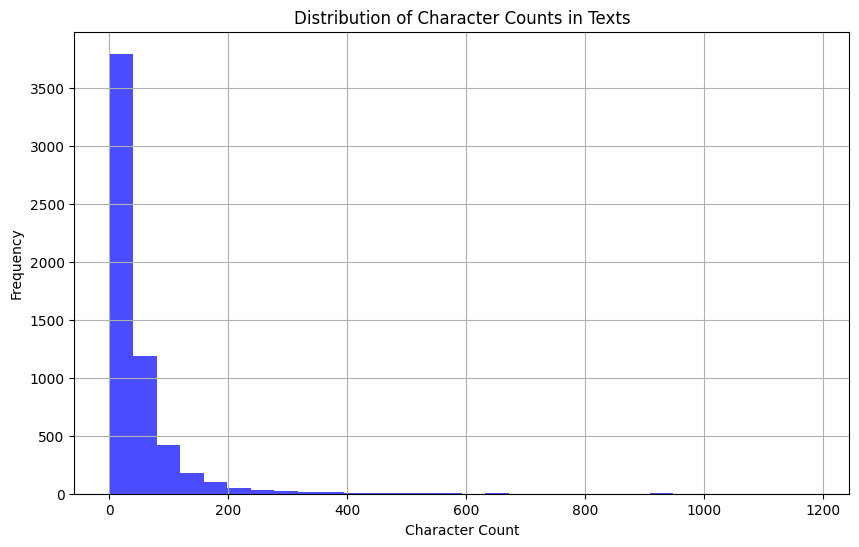

In [81]:
#글자 수 시각화
import pandas as pd
import matplotlib.pyplot as plt

data = crawling_data.copy()

# 각 텍스트의 글자 수를 계산
data['length'] = data['contentText'].apply(len)

# 최솟값, 최댓값, 평균, 중간값 출력
min_count = data['length'].min()
max_count = data['length'].max()
mean_count = data['length'].mean()
median_count = data['length'].median()

print(f"최솟값: {min_count}")
print(f"최댓값: {max_count}")
print(f"평균값: {mean_count}")
print(f"중간값: {median_count}")

# 글자 수의 분포를 히스토그램으로 시각화
plt.figure(figsize=(10, 6))
plt.hist(data['length'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Character Counts in Texts')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

최솟값: 0
최댓값: 266
평균값: 11.240279672578446
중간값: 6.0


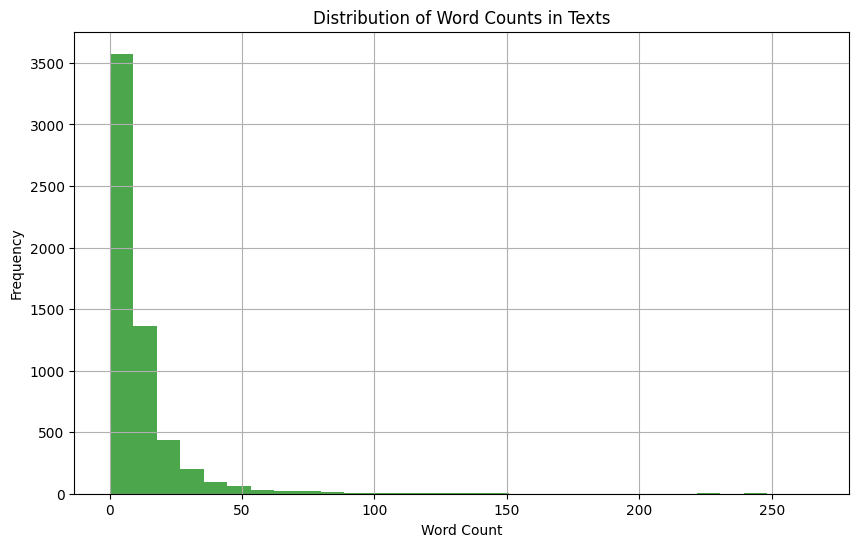

In [82]:
#old열 단어 수 시각화

# 'old' 열의 각 텍스트의 단어 수를 계산
data['word_count'] = data['contentText'].apply(lambda x: len(str(x).split()))

# 최솟값, 최댓값, 평균, 중간값 출력
min_count = data['word_count'].min()
max_count = data['word_count'].max()
mean_count = data['word_count'].mean()
median_count = data['word_count'].median()

print(f"최솟값: {min_count}")
print(f"최댓값: {max_count}")
print(f"평균값: {mean_count}")
print(f"중간값: {median_count}")

# 단어 수의 분포를 히스토그램으로 시각화
plt.figure(figsize=(10, 6))
plt.hist(data['word_count'], bins=30, color='green', alpha=0.7)
plt.title('Distribution of Word Counts in Texts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## 데이터 정제

In [77]:
import numpy as np

crawling_data.drop_duplicates(subset = ['contentText'], inplace=True) # 중복인 내용이 있다면 중복 제거

In [78]:
# 맨 처음에 위치한 '@{영어와 숫자, 특수문자 '-'로 이루어진 문자}'를 제거하고 양쪽 공백을 제거
crawling_data['contentText'] = crawling_data['contentText'].str.replace(r"^@[a-zA-Z0-9\-_]+", "", regex=True).str.strip()

In [79]:
# 맨 처음에 위치한 '@{영어와 숫자, 특수문자 '-'로 이루어진 문자}'를 제거하고 양쪽 공백을 제거
crawling_data['contentText'] = crawling_data['contentText'].str.replace(r"^@[a-zA-Z0-9\-_]+", "", regex=True).str.strip()
crawling_data['contentText'] = crawling_data['contentText'].str.replace("\n", "", regex=False) # 줄바꿈 문자 제거
crawling_data['contentText'] = crawling_data['contentText'].str.replace(r"[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z0-9 ]", "", regex=True) # 특수문자 제거
crawling_data['contentText'] = crawling_data['contentText'].str.replace('^ +', "") # 공백은 empty 값으로 변경
crawling_data['contentText'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
crawling_data = crawling_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(crawling_data))

전처리 후 테스트용 샘플의 개수 : 5864


In [80]:
crawling_data.head(20)

,contentText
0,드디어 영화 Her가 현실이 되었네 음색 옵션에 스칼렛 요한슨 음성으로가 있으면 좋겠다
1,진짜 헐Her이다
2,실제로 샘알트먼이 그렇게 슬쩍 하려다가 걸려서 스칼렛 법률팀한테 지금 고소당하기 직전이네요 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 성지순례
3,근데 하나도 안비슷하긴 하더라 걍 다른 성우던데
4,별로
5,미국 자비스 만듬한국 성형외과 미용 수술함미국 chatgpt gemini LLM등 인공지능 내전하면서 미친듯이 성장한국 어떻게 먹은건지 신기한 아시아 최대크기 IT기업도 일본에 선물로 줌IT강국
6,저긴 AI 법 제정하네 마네 하는데 우리는 여성 할당제 시행하네 폐지하네 이딴 걸로만 싸우고 있음 ㅋ
7,심지어 중국 최상위권 입시 준비반 인공지능학과한국 최상위권 입시 준비반 의대 진학반여기서만 봐도 걍 나라 망조임 ㅋㅋ
8,팩트는 어차피 특이점 와서 나라 망하든 말든 상관없다는거임ㅋㅋㅋㅋㅋ
9,미국한테 못비비지


In [67]:
#csv 파일로 저장
path_to_save = '/content/drive/MyDrive/대학자료/대4/4학년 2학기/국어정보학/기말보고서/data/youtube_chatgpt_news_comments_cleaned.csv'
crawling_data.to_csv(path_to_save, index=False)